<a href="https://colab.research.google.com/github/prof-nuduls/EE628HW/blob/main/EE628_HW3_Miller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data( num_words=10000)

In [23]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [24]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [25]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, activation='relu'))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [26]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mse,
              metrics=[metrics.binary_accuracy])

In [27]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [28]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 5s 109ms/step - loss: 0.1708 - acc: 0.7797 - val_loss: 0.1367 - val_acc: 0.8253
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1025 - acc: 0.8922 - val_loss: 0.1029 - val_acc: 0.8788
Epoch 3/20
30/30 [==============================] - 2s 55ms/step - loss: 0.0806 - acc: 0.9139 - val_loss: 0.1040 - val_acc: 0.8630
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0692 - acc: 0.9260 - val_loss: 0.0878 - val_acc: 0.8904
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0610 - acc: 0.9345 - val_loss: 0.0855 - val_acc: 0.8900
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0545 - acc: 0.9457 - val_loss: 0.0843 - val_acc: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0502 - acc: 0.9485 - val_loss: 0.0842 - val_acc: 0.8857
Epoch 8/20
30/30 [==============================] - 2s 65ms/step - loss: 0.0458 - 

In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

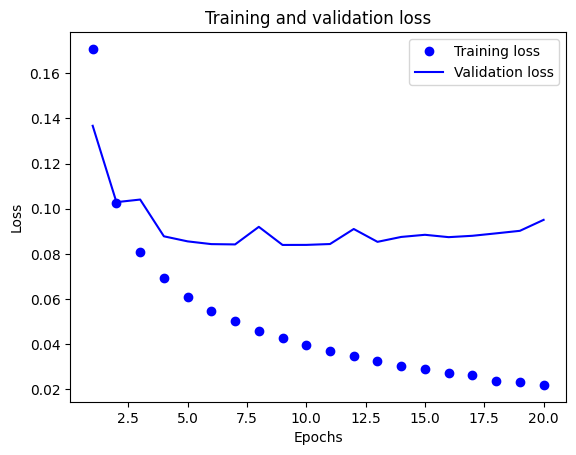

In [30]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
from keras.datasets import fashion_mnist
(train_data, train_labels),(test_data, test_labels) = fashion_mnist.load_data()


In [32]:
train_data.shape

(60000, 28, 28)

In [33]:
test_data.shape

(10000, 28, 28)

In [34]:
from keras import models
from keras import layers
from keras import regularizers
network = models.Sequential()
network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.5), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [35]:
from keras import losses
from keras import metrics
from keras import optimizers

network.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [36]:
from keras.utils import to_categorical
x_train = train_data.reshape((train_data.shape[0], 28 * 28)).astype('float32')
x_val = test_data.reshape((test_data.shape[0], 28 * 28)).astype('float32')
y_train = to_categorical(train_labels)
y_val = to_categorical(test_labels)

In [37]:
network.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = network.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
118/118 [==============================] - 4s 29ms/step - loss: 99.9379 - acc: 0.5792 - val_loss: 19.6515 - val_acc: 0.4128
Epoch 2/20
118/118 [==============================] - 3s 26ms/step - loss: 12.1059 - acc: 0.5926 - val_loss: 7.4674 - val_acc: 0.7137
Epoch 3/20
118/118 [==============================] - 4s 37ms/step - loss: 9.0843 - acc: 0.6001 - val_loss: 7.4356 - val_acc: 0.6329
Epoch 4/20
118/118 [==============================] - 3s 27ms/step - loss: 8.8594 - acc: 0.6074 - val_loss: 4.4449 - val_acc: 0.6741
Epoch 5/20
118/118 [==============================] - 3s 27ms/step - loss: 8.1197 - acc: 0.6108 - val_loss: 7.6084 - val_acc: 0.5620
Epoch 6/20
118/118 [==============================] - 3s 29ms/step - loss: 7.5311 - acc: 0.6198 - val_loss: 7.7014 - val_acc: 0.5472
Epoch 7/20
118/118 [==============================] - 4s 33ms/step - loss: 7.0545 - acc: 0.6098 - val_loss: 8.6005 - val_acc: 0.6471
Epoch 8/20
118/118 [==============================] - 3s 27ms/step

In [38]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

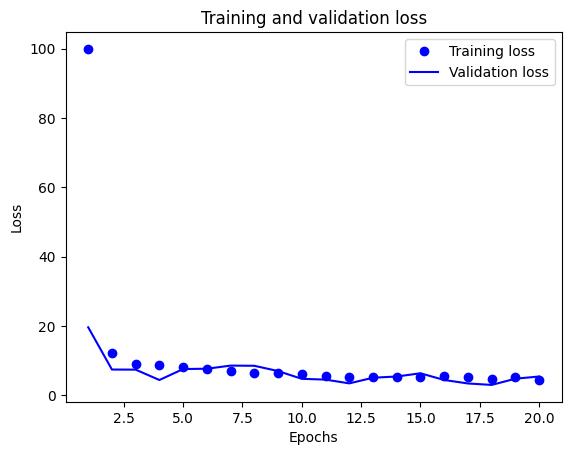

In [39]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
from keras import models
from keras import layers
from keras import regularizers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
#network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))

In [41]:
network.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = network.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
118/118 [==============================] - 5s 39ms/step - loss: 6.7900 - acc: 0.6578 - val_loss: 2.1308 - val_acc: 0.7327
Epoch 2/20
118/118 [==============================] - 3s 26ms/step - loss: 1.1245 - acc: 0.7600 - val_loss: 1.4727 - val_acc: 0.6424
Epoch 3/20
118/118 [==============================] - 3s 26ms/step - loss: 0.4437 - acc: 0.7894 - val_loss: 0.3021 - val_acc: 0.7719
Epoch 4/20
118/118 [==============================] - 3s 26ms/step - loss: 0.1331 - acc: 0.8156 - val_loss: 0.2130 - val_acc: 0.7807
Epoch 5/20
118/118 [==============================] - 4s 37ms/step - loss: 0.0938 - acc: 0.8386 - val_loss: 0.1308 - val_acc: 0.8129
Epoch 6/20
118/118 [==============================] - 3s 27ms/step - loss: 0.0822 - acc: 0.8505 - val_loss: 0.1138 - val_acc: 0.8262
Epoch 7/20
118/118 [==============================] - 3s 27ms/step - loss: 0.0749 - acc: 0.8611 - val_loss: 0.1292 - val_acc: 0.8169
Epoch 8/20
118/118 [==============================] - 3s 27ms/step - 

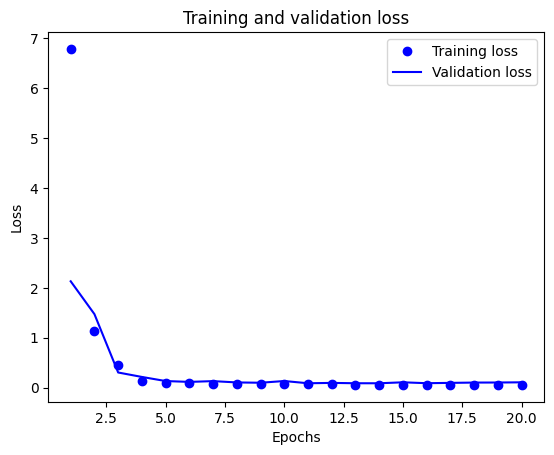

In [42]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()